In [1]:
from aqua import Reader,catalogue, inspect_catalogue
import sys
sys.path.append("../")
import global_ocean_func as fn

FDB5 binary library not present on system, disabling FDB support.


In [2]:
reader = Reader(model='FESOM', exp='tco2559-ng5-cycle3', source="lra-r100-monthly")
yearly_data = reader.retrieve()[["ocpt","so"]].resample(time="Y").mean()

yearly_data=yearly_data.rename({"nz1":"lev"})
yearly_data=yearly_data.rename({"ocpt":"thetao"})
# data=data[["thetao","so"]]

# yearly_data=data.resample(time="Y").mean()
yearly_data

<xarray.Dataset>
Dimensions:  (time: 5, lev: 69, lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lev      (lev) float64 2.5 7.5 12.5 17.5 ... 5.525e+03 5.825e+03 6.175e+03
  * time     (time) datetime64[ns] 2020-12-31 2021-12-31 ... 2024-12-31
Data variables:
    thetao   (time, lev, lat, lon) float64 dask.array<chunksize=(1, 69, 180, 360), meta=np.ndarray>
    so       (time, lev, lat, lon) float64 dask.array<chunksize=(1, 69, 180, 360), meta=np.ndarray>

In [3]:
global_mean_anom = fn.std_anom_wrt_initial(yearly_data, use_predefined_region=True, region="Global Ocean")
atlantic_mean_anom = fn.std_anom_wrt_initial(yearly_data, use_predefined_region=True, region="Atlantic Ocean")
pacific_mean_anom = fn.std_anom_wrt_initial(yearly_data, use_predefined_region=True, region="Pacific Ocean")
indian_mean_anom = fn.std_anom_wrt_initial(yearly_data, use_predefined_region=True, region="Indian Ocean")
arctic_mean_anom = fn.std_anom_wrt_initial(yearly_data, use_predefined_region=True, region="Arctic Ocean")
southern_mean_anom = fn.std_anom_wrt_initial(yearly_data, use_predefined_region=True, region="Southern Ocean")


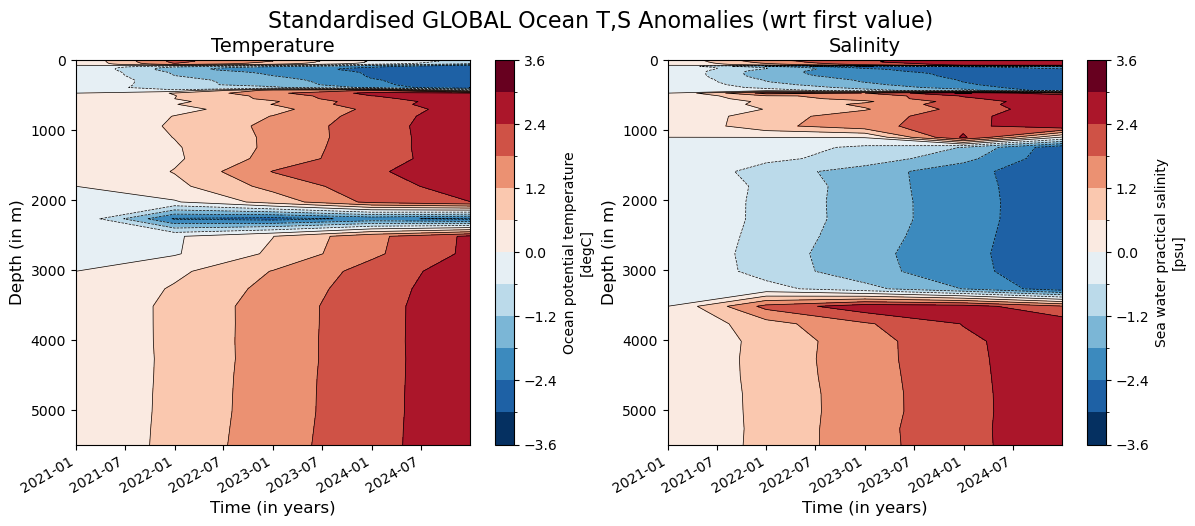

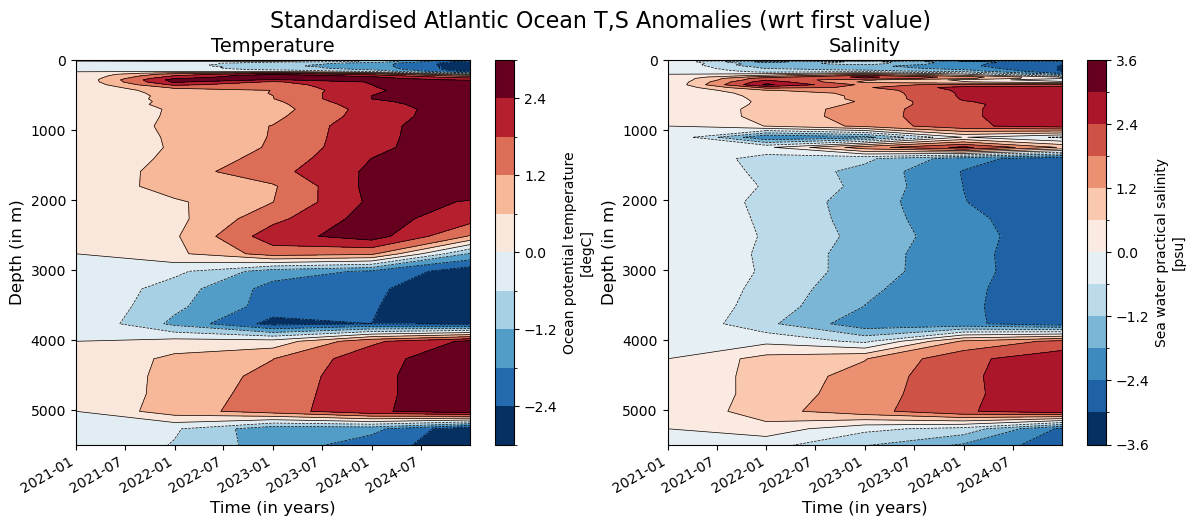

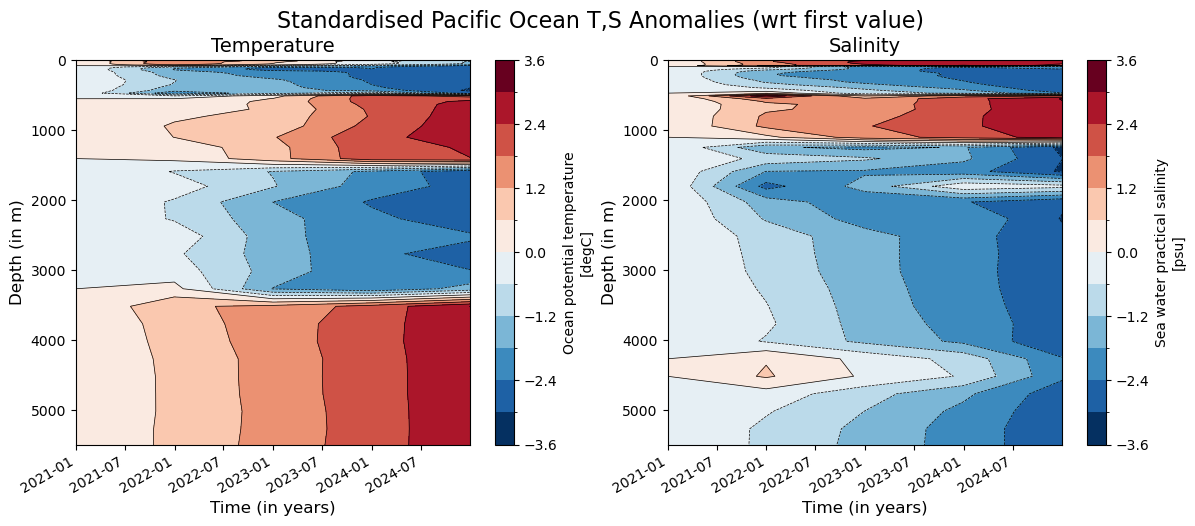

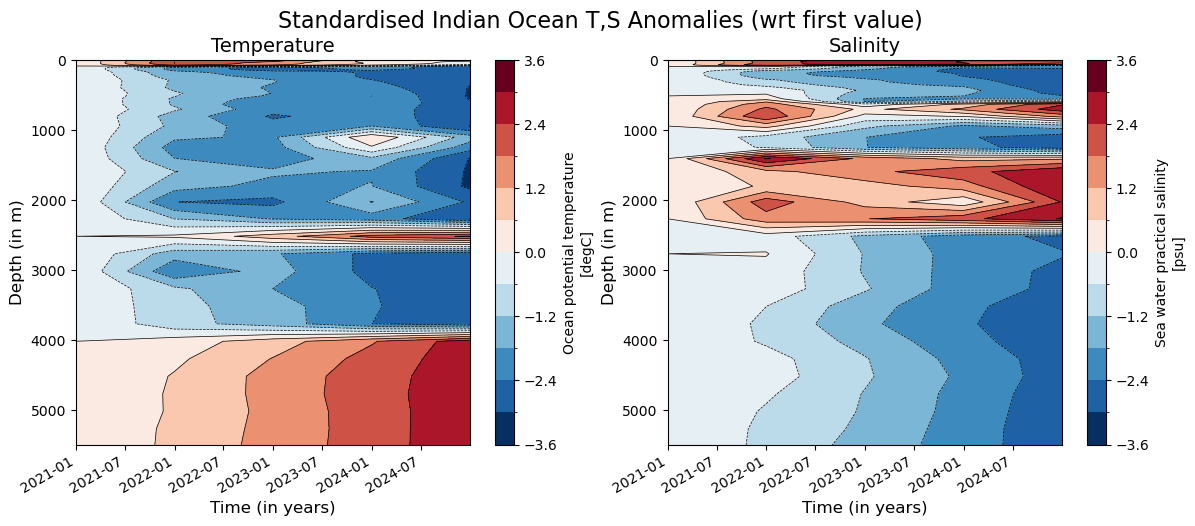

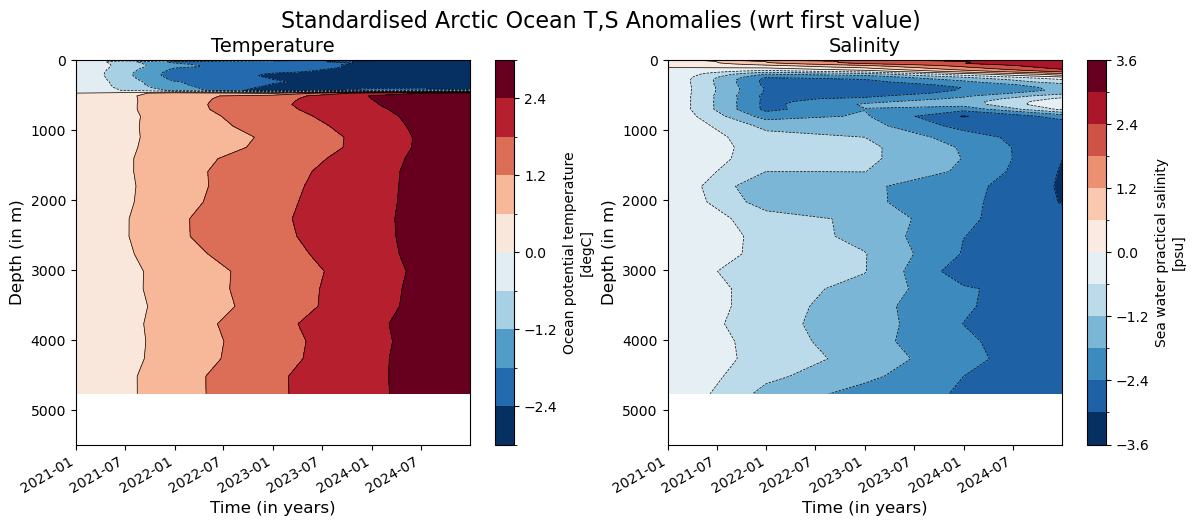

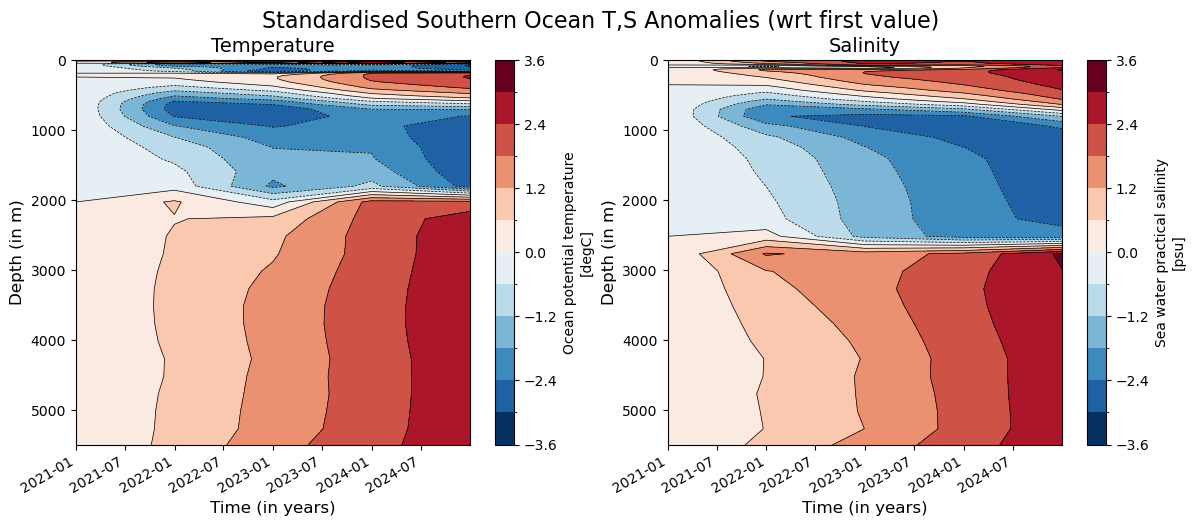

In [7]:
fn.thetao_so_anom_plot(global_mean_anom,"Global Ocean")
fn.thetao_so_anom_plot(atlantic_mean_anom,"Atlantic Ocean")
fn.thetao_so_anom_plot(pacific_mean_anom,"Pacific Ocean")
fn.thetao_so_anom_plot(indian_mean_anom,"Indian Ocean")
fn.thetao_so_anom_plot(arctic_mean_anom,"Arctic Ocean")
fn.thetao_so_anom_plot(southern_mean_anom,"Southern Ocean")

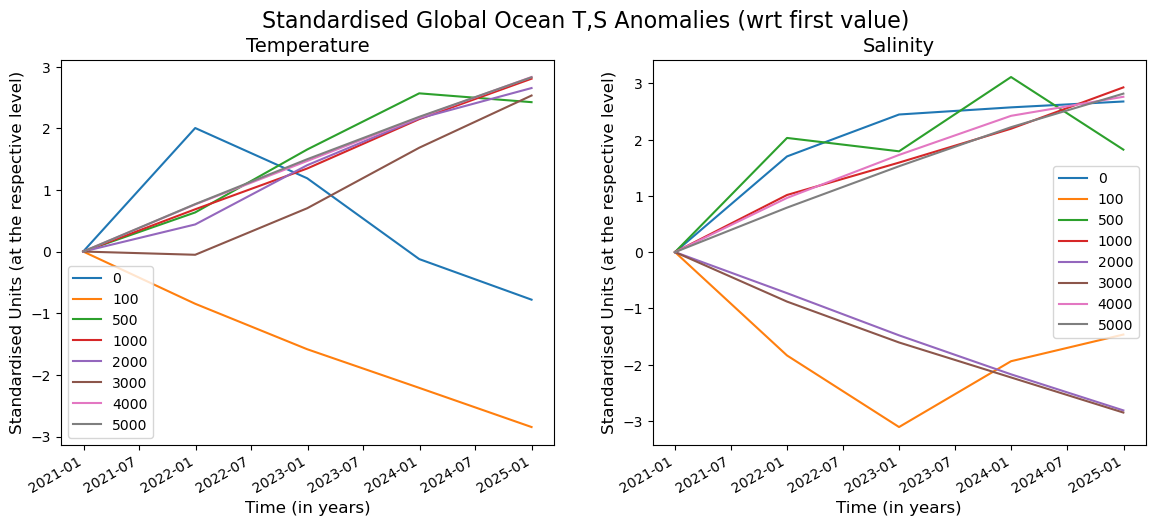

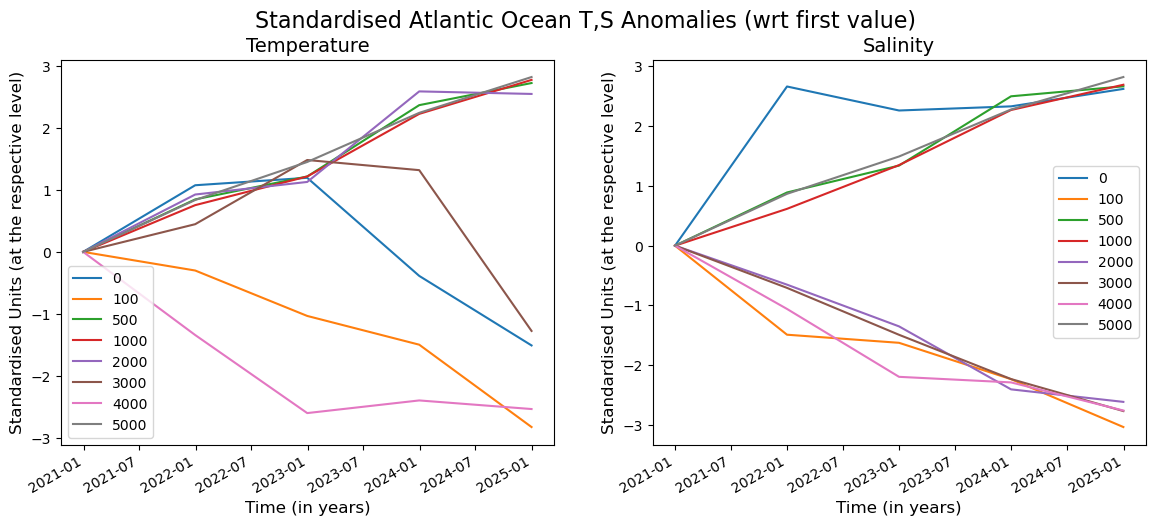

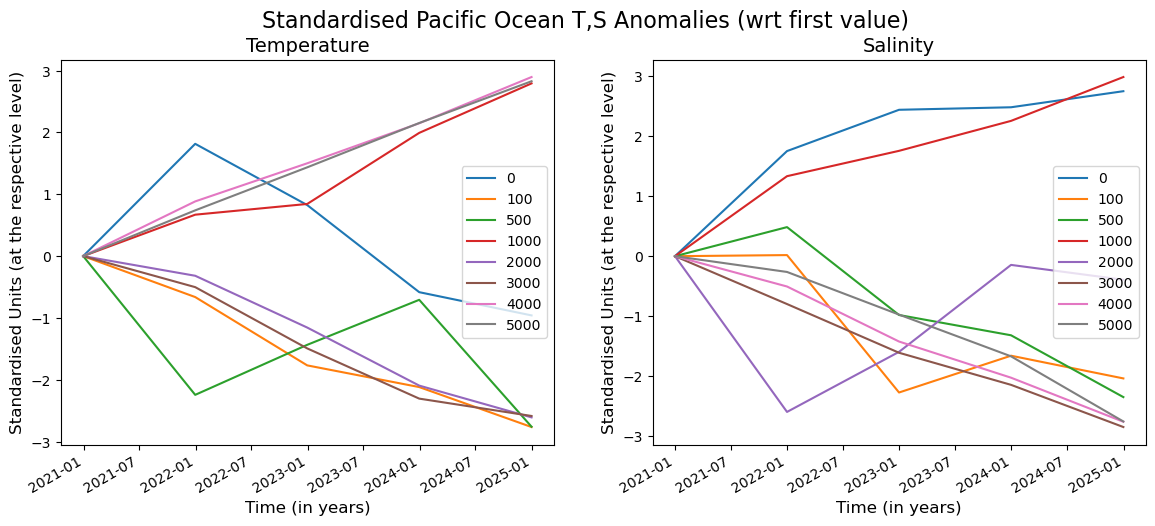

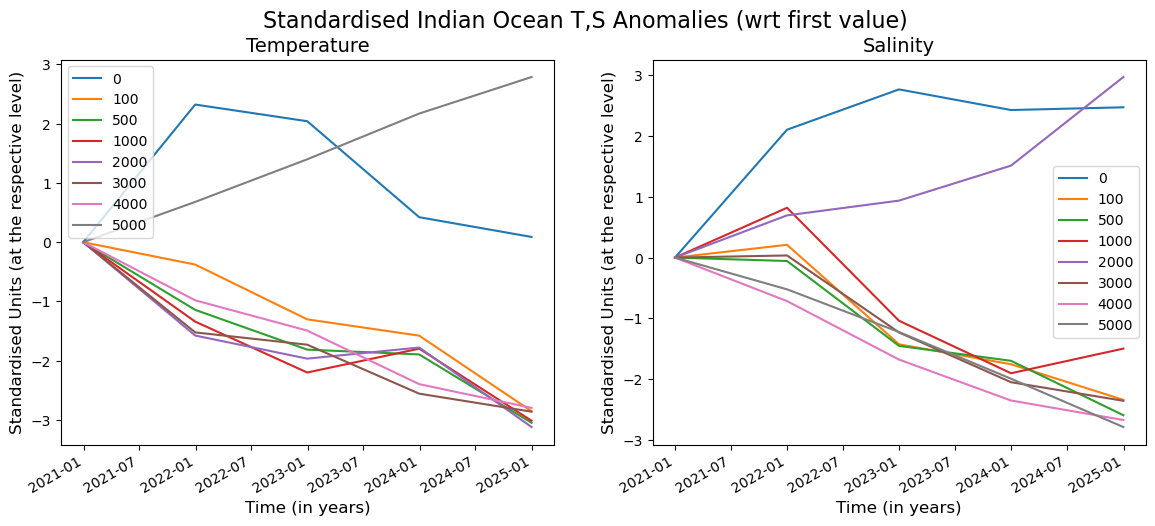

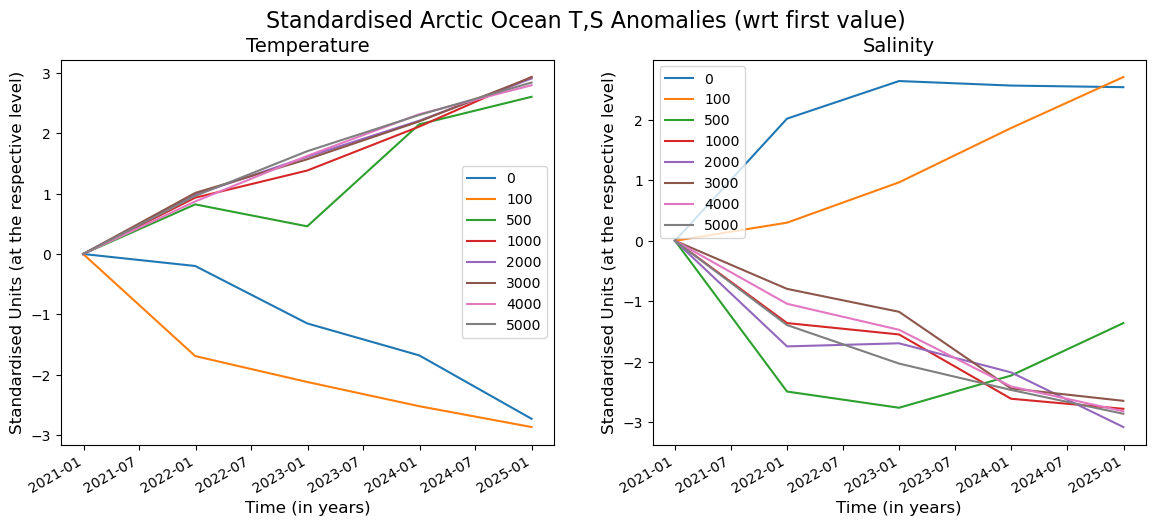

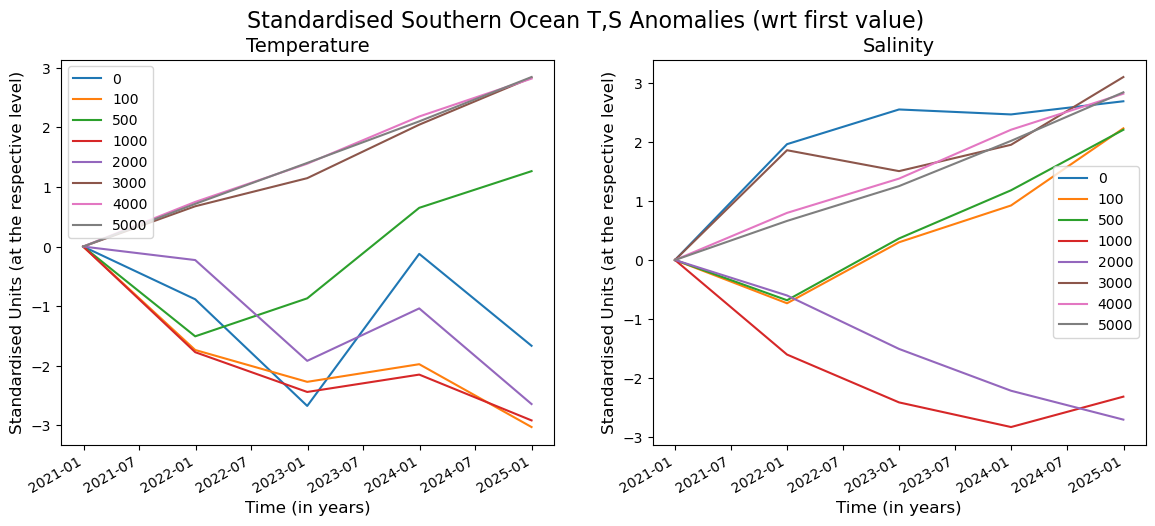

In [8]:
fn.time_series(global_mean_anom,'Global Ocean',customise_level=False, levels=list])
fn.time_series(atlantic_mean_anom,'Atlantic Ocean')
fn.time_series(pacific_mean_anom,'Pacific Ocean')
fn.time_series(indian_mean_anom,'Indian Ocean')
fn.time_series(arctic_mean_anom,'Arctic Ocean')
fn.time_series(southern_mean_anom,'Southern Ocean')

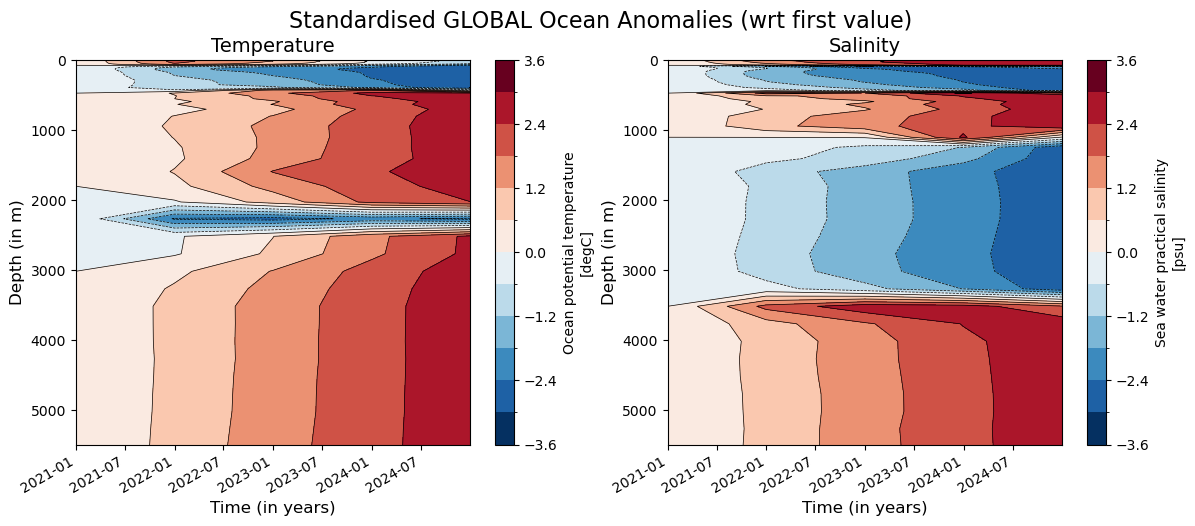

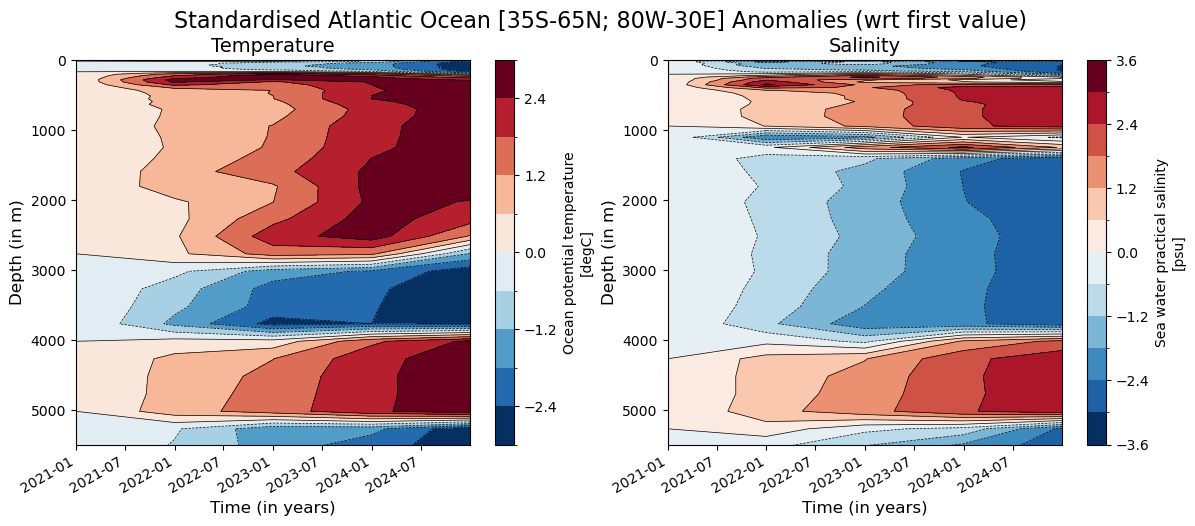

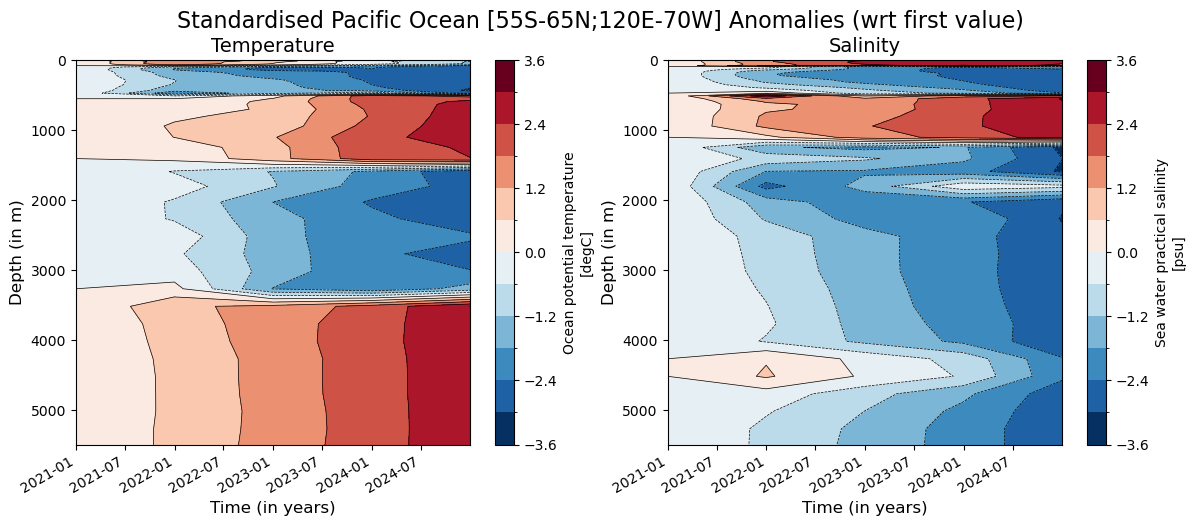

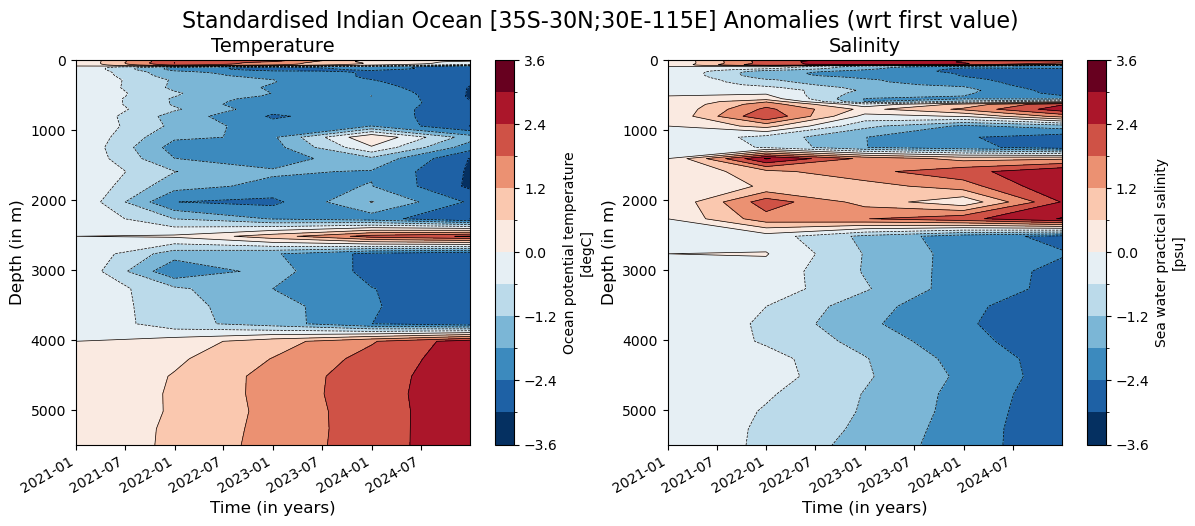

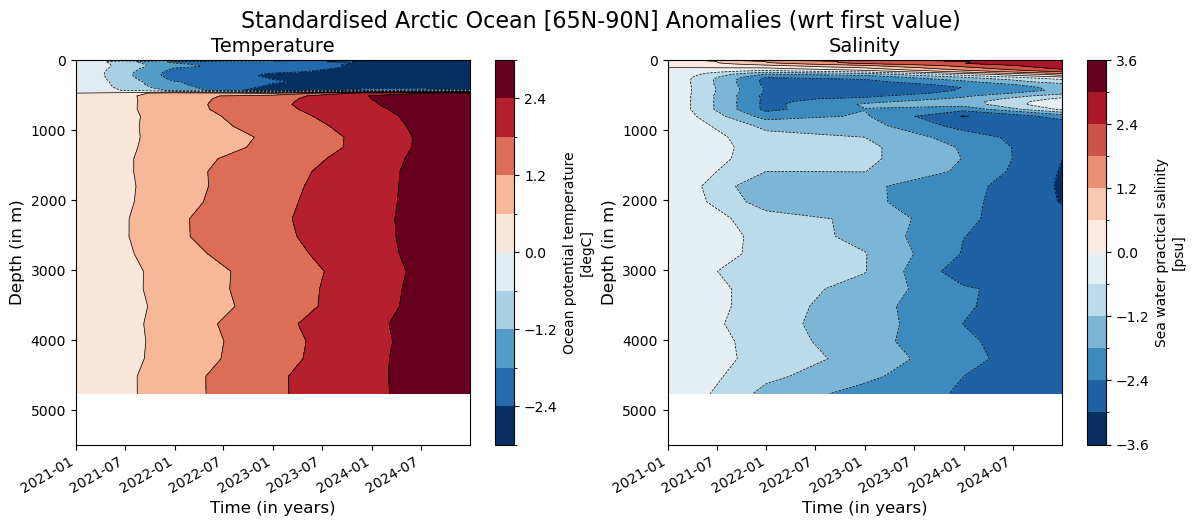

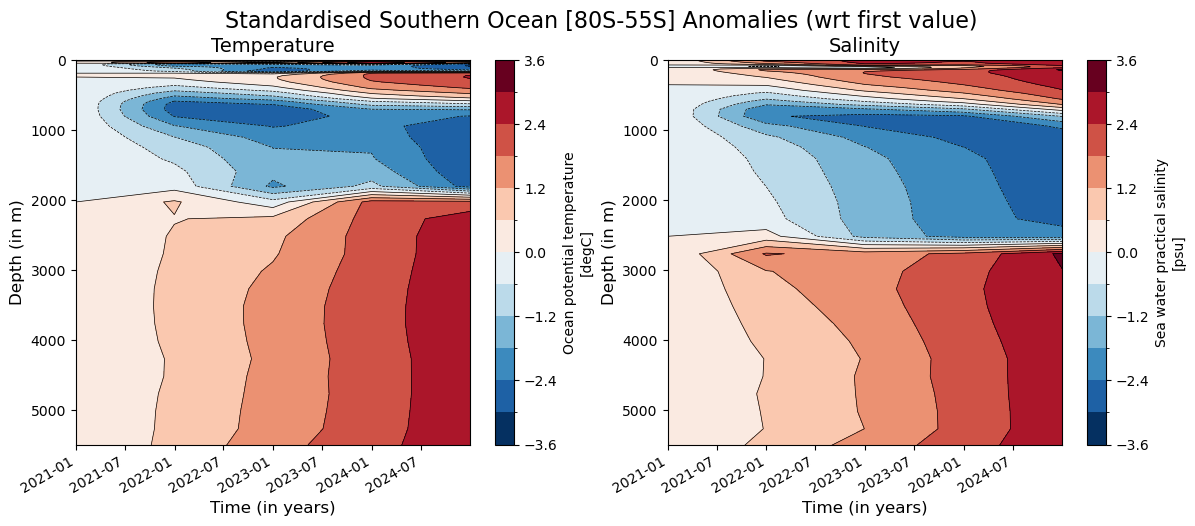

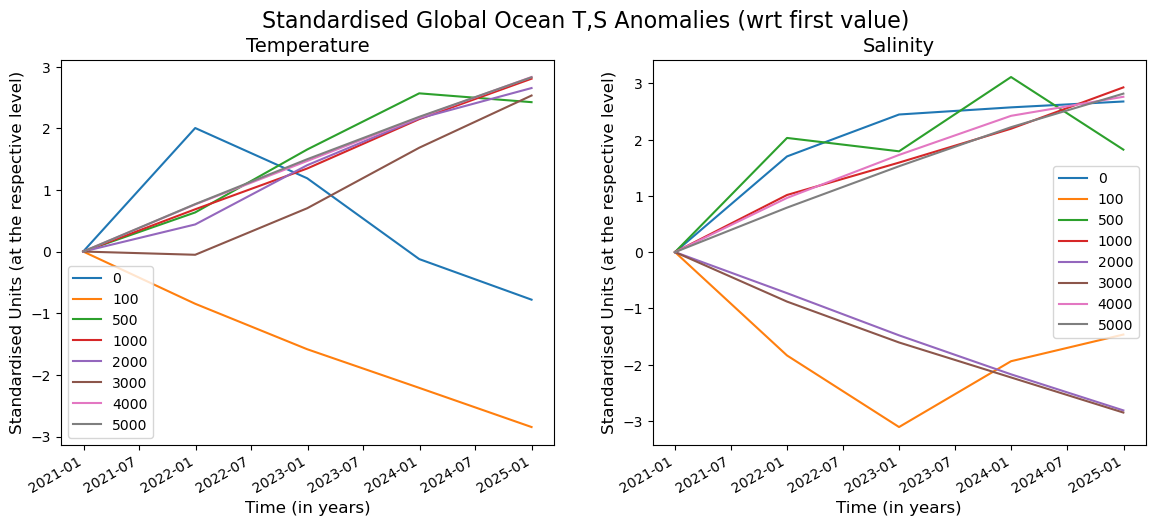

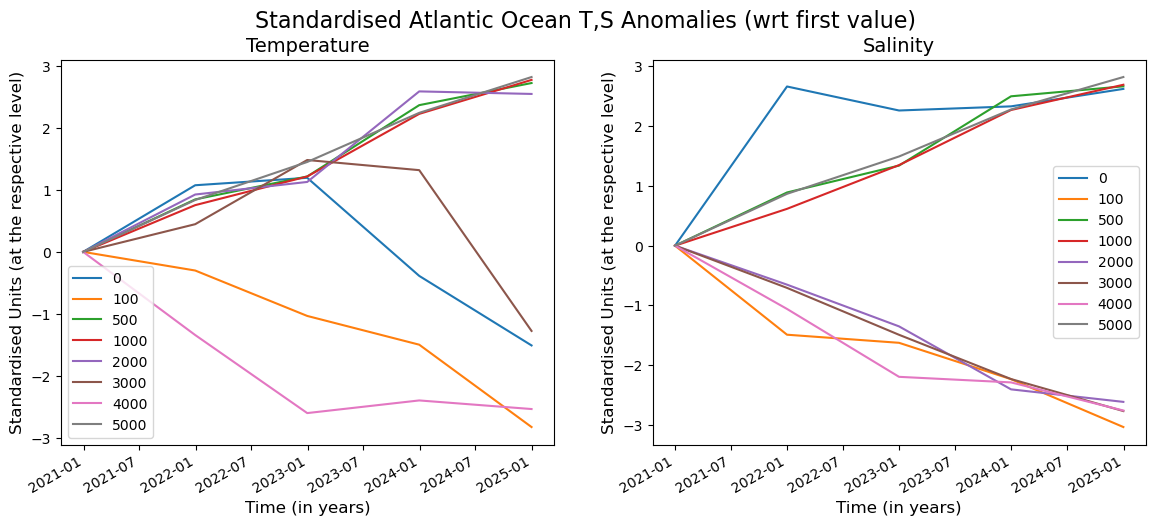

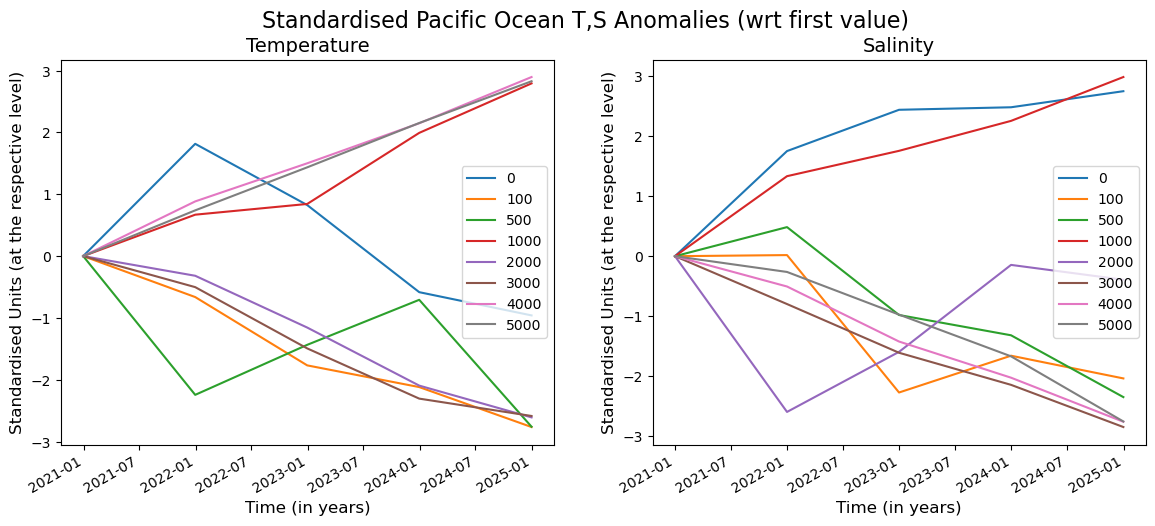

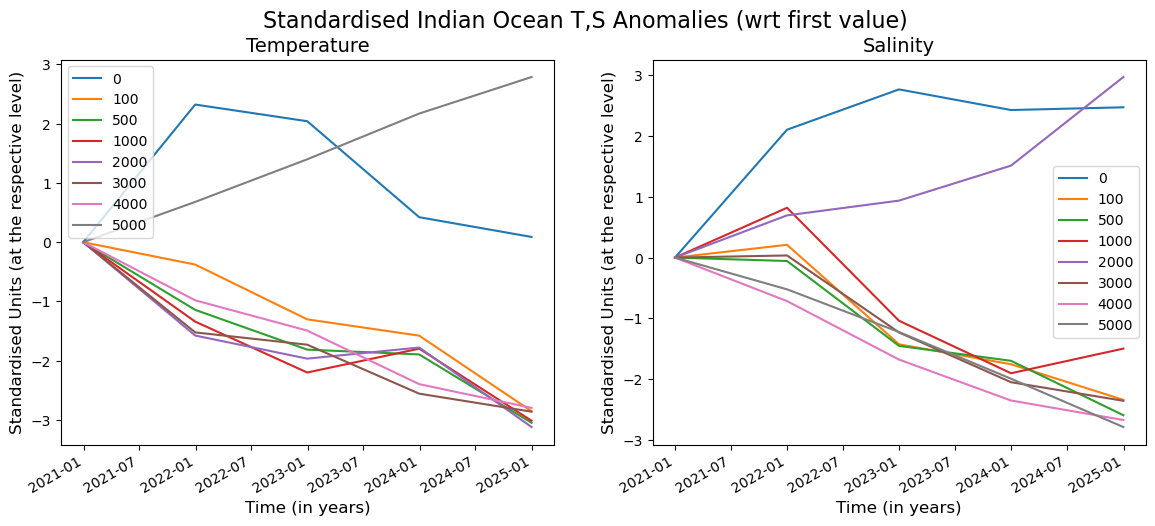

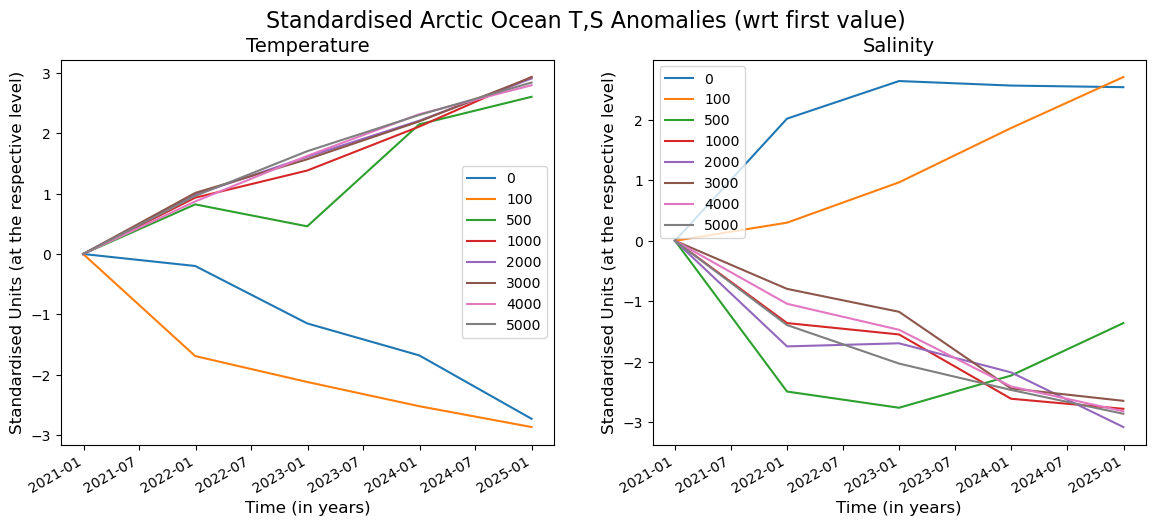

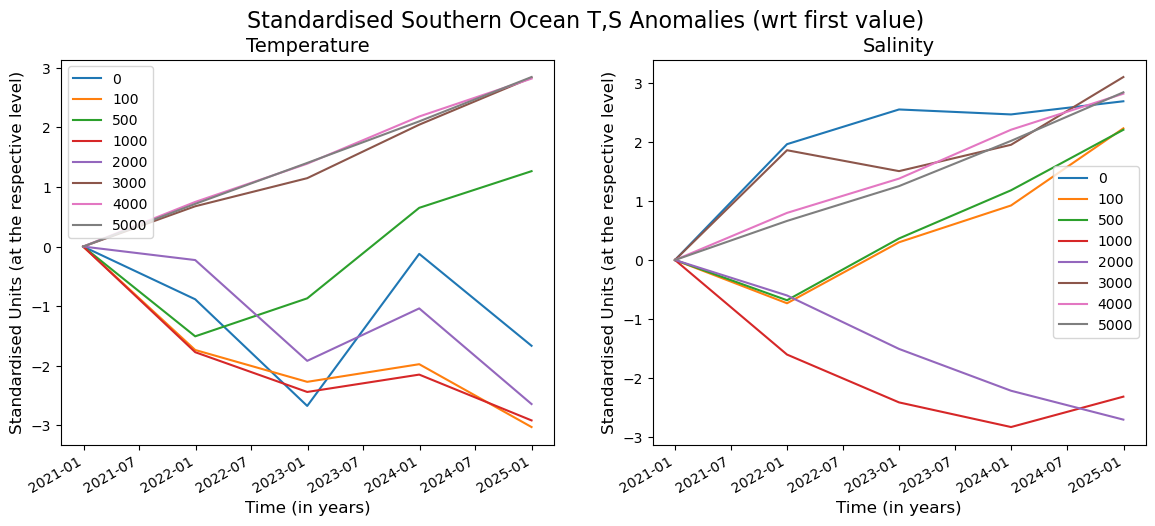

In [2]:
# Testing of diag_class file
from global_ocean_class_basin_T_S_means import Global_OceanDiagnostic

# Create an instance of the Ocean_circulationDiagnostic class
diagnostic = Global_OceanDiagnostic(model='FESOM', exp='tco2559-ng5-cycle3', source='lra-r100-monthly')

# Run the diagnostics
diagnostic.run_diagnostics()